In [61]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  7 15:47:23 2018

@author: Fabio
"""

import networkx as nx
import math
import matplotlib.pylab as plt
import numpy as np
from matplotlib.pyplot import figure
import pandas as pd



  
def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 

    
# Armo las tablas en el programa
# Al ldata le cambiamos para que las separaciones sean por tabs y no por espacios
    
LIT=ldata("yeast_LIT.txt")
APMS=ldata("yeast_AP-MS.txt")
Y2H=ldata("yeast_Y2H.txt")
LITR=ldata("yeast_LIT_Reguly.txt")
PaHe=ldata("Essential_ORFs_paperHe.txt")


# Con esto armo una lista de enlaces para la lista del LIT Reguly
# Porque el archivo LIT Reguly pasado a lista tenía más de dos columnas 
# y no se lo podía pasar al comando G.add_edges


e_LITR=[[x[0],x[1]]  for x in LITR]
del(e_LITR[0])


# Con el siguiente comando armo la lista de proteínas esenciales

del(PaHe[len(PaHe)-1])
del(PaHe[len(PaHe)-1])
del(PaHe[len(PaHe)-1])
del(PaHe[len(PaHe)-1])

Ess=[x[1] for x in PaHe]
del(Ess[0])
del(Ess[0])

DS=[LIT,Y2H,APMS,e_LITR]
DSl=["LIT","Y2H","APMS","LITR"]

In [5]:
# Datos para la tabla 1

# Numero de nodos
N=len(G.nodes())
print("Numero de nodos es:{}".format(N))

# Numero de enlaces
E=len(G.edges())
print("Numero de enlaces es:{}".format(E))

# Grado medio

Grad= [x[1]  for x in G.degree()]
Gm=np.mean(Grad)
print("Valor del grado medio es:{}".format(Gm))

# Grado de Clustering medio

Cl=nx.average_clustering(G)
print("El coeficiente de Clustering promedio es:{}".format(Cl))


Numero de nodos es:1536
Numero de enlaces es:2925
Valor del grado medio es:3.80859375
El coeficiente de Clustering promedio es:0.2924923005815711


In [31]:
# Tabla 2 Zotenko

l=0

for i in range(len(DS)):
    for j in range(len(DS)):
        if i!=j:
            G=nx.Graph()
            G.add_edges_from(DS[i])

            L=nx.Graph()
            L.add_edges_from(DS[j])
            
            # Armo las listas temporales y las curo
            
            temp1=[x for x in G.edges()]
       
            temp2=[x for x in L.edges()]         
            l=l+1
            
            # Calculo del solapamiento
            fc=0
            for enlace1 in temp1:
                tenlace1=[enlace1[1],enlace1[0]]
                for enlace2 in temp2:
                    if enlace1==enlace2:
                        fc=fc+(1/len(G.edges()))
                    if tenlace1==enlace2:
                        fc=fc+(1/len(G.edges()))
                        
                if enlace1==temp1[len(temp1)-1]:
                    print("Cálculo número:{}".format(l))
                    print("La fracción de enlaces comunes entre {} y {} es: {}".format(DSl[i],DSl[j],fc))


Cálculo número:1
La fracción de enlaces correlacionados entre LIT y Y2H es: 0.07487179487179485
Cálculo número:2
La fracción de enlaces correlacionados entre LIT y APMS es: 0.35452991452990956
Cálculo número:3
La fracción de enlaces correlacionados entre LIT y e_LITR es: 0.6523076923076669
Cálculo número:4
La fracción de enlaces correlacionados entre Y2H y LIT es: 0.07474402730375387
Cálculo número:5
La fracción de enlaces correlacionados entre Y2H y APMS es: 0.0757679180887368
Cálculo número:6
La fracción de enlaces correlacionados entre Y2H y e_LITR es: 0.11467576791808796
Cálculo número:7
La fracción de enlaces correlacionados entre APMS y LIT es: 0.1143329658213906
Cálculo número:8
La fracción de enlaces correlacionados entre APMS y Y2H es: 0.024476295479603106
Cálculo número:9
La fracción de enlaces correlacionados entre APMS y e_LITR es: 0.18974641675854906
Cálculo número:10
La fracción de enlaces correlacionados entre e_LITR y LIT es: 0.16090403103390846
Cálculo número:11
La fra

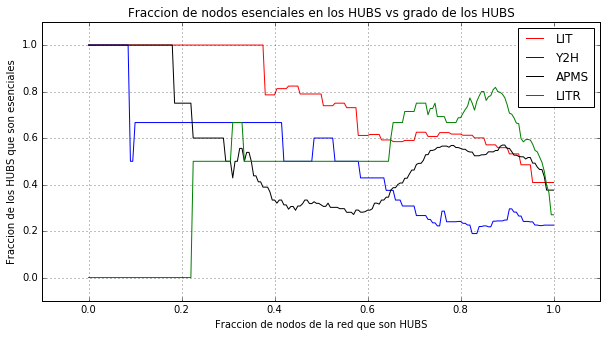

In [83]:
# Figura 1.a


mar=["r","b","k","g"]

for p in range(len(DS)):
    G=nx.Graph()
    G.add_edges_from(DS[p])

    # Armo la lista de nodos con el grado asociado, la lista NG (Nodos y Grados)

    NG=[[x[0],x[1]] for x in G.degree()]

    # Armo el criterio para que al ordenar, ordeno la lista NG segun grados

    def tomarsegundo (elem):
        return elem[1]

    NG.sort(key=tomarsegundo)

    LG=[x[1] for x in NG] #Los grados ordenados de mi lista NG
    

    fr=np.arange(0,1.005,0.005) # Porcentajes de Cutoff del Hub


    # Con este comando armo la lista HUBS, que es una lista de listas, donde en cada
    # componente, guarda la lista de nodos con grado mayor al gradmin, y su correspondiente grado.
    HUBS=[]
    for i in range(len(fr)):
        NG=[[x[0],x[1]] for x in G.degree()]
        NG.sort(key=tomarsegundo)
        gradmin=math.floor((NG[len(NG)-1][1])*fr[i])
        for k in range(1,gradmin):
            borrar=LG.count(k)
            for m in range(borrar):
                del(NG[0])
        HUBS.append(NG)

    # Ahora cuento en cada una de las listas, cuál es la cantida de nodos esenciales


    Fraces=[] # Lista con la FRACción de nodos EScenciales para cada valor de gradmin

    for i in range(len(HUBS)):
        num=0
        for nodo1 in Ness:
            for nodo2 in HUBS[i]:
                if nodo1==nodo2[0]:
                    num += 1
        num=num/(len(HUBS[i]))
        Fraces.append(num)

    # Ya tengo lo que va en el eje y, necesito lo que va en el eje x y lo puedo graficar

    gradosmin=[1-i for i in fr]

    plt.plot(gradosmin,Fraces,"{}".format(mar[p]),label="{}".format(DSl[p]))

    
plt.grid(True)
plt.axis([-0.10,1.1,-0.1,1.1])
plt.rcParams["figure.figsize"] = [10,5]
plt.xlabel("Fraccion de nodos de la red que son HUBS")
plt.ylabel("Fraccion de los HUBS que son esenciales")
plt.title("Fraccion de nodos esenciales en los HUBS vs grado de los HUBS")
plt.legend()
plt.show()


In [68]:
for p in range(len(DS)):
    G=nx.Graph()
    G.add_edges_from(DS[p])

        # Armo la lista de nodos con el grado asociado, la lista NG (Nodos y Grados)

    NG=[[x[0],x[1]] for x in G.degree()]

        # Armo el criterio para que al ordenar, ordeno la lista NG segun grados

    def tomarsegundo (elem):
        return elem[1]

    NG.sort(key=tomarsegundo)

    LG=[x[1] for x in NG] #Los grados ordenados de mi lista NG


    fr=np.arange(0,1.01,0.01) # Porcentajes de Cutoff del Hub


        # Con este comando armo la lista HUBS, que es una lista de listas, donde en cada
        # componente, guarda la lista de nodos con grado mayor al gradmin, y su correspondiente grado.
    HUBS=[]
    for i in range(len(fr)):
        NG=[[x[0],x[1]] for x in G.degree()]
        NG.sort(key=tomarsegundo)
        gradmin=math.floor((NG[len(NG)-1][1])*fr[i])
        for k in range(1,gradmin):
            borrar=LG.count(k)
            for m in range(borrar):
                del(NG[0])
        HUBS.append(NG)

    print("Datos de la red {}".format(DSl[p]))
    
    for i in range(len(HUBS)):
        num=0
        for nodo2 in HUBS[i]:
            for nodo1 in Ess:
                if nodo1==nodo2[0]:
                    num += 1
        print("Lista numero {}".format(i))
        print("Cantidad de nodos esenciales: {}".format(num))
        print("Cantidad de nodos: {}".format(len(HUBS[i])))



Datos de la red LIT
Lista numero 0
Cantidad de nodos esenciales: 644
Cantidad de nodos: 1536
Lista numero 1
Cantidad de nodos esenciales: 644
Cantidad de nodos: 1536
Lista numero 2
Cantidad de nodos esenciales: 644
Cantidad de nodos: 1536
Lista numero 3
Cantidad de nodos esenciales: 644
Cantidad de nodos: 1536
Lista numero 4
Cantidad de nodos esenciales: 644
Cantidad de nodos: 1536
Lista numero 5
Cantidad de nodos esenciales: 500
Cantidad de nodos: 1006
Lista numero 6
Cantidad de nodos esenciales: 500
Cantidad de nodos: 1006
Lista numero 7
Cantidad de nodos esenciales: 500
Cantidad de nodos: 1006
Lista numero 8
Cantidad de nodos esenciales: 401
Cantidad de nodos: 735
Lista numero 9
Cantidad de nodos esenciales: 401
Cantidad de nodos: 735
Lista numero 10
Cantidad de nodos esenciales: 307
Cantidad de nodos: 537
Lista numero 11
Cantidad de nodos esenciales: 307
Cantidad de nodos: 537
Lista numero 12
Cantidad de nodos esenciales: 307
Cantidad de nodos: 537
Lista numero 13
Cantidad de nodos

Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 69
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 70
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 71
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 72
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 73
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 74
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 75
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 76
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 77
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 78
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 79
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 80
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 81
Cantidad de nodos esenciales: 2
Cantidad de nodos: 3
Lista numero 82
Cantidad de nodos esenciales: 2
Ca

Lista numero 0
Cantidad de nodos esenciales: 924
Cantidad de nodos: 3307
Lista numero 1
Cantidad de nodos esenciales: 748
Cantidad de nodos: 1980
Lista numero 2
Cantidad de nodos esenciales: 579
Cantidad de nodos: 1224
Lista numero 3
Cantidad de nodos esenciales: 443
Cantidad de nodos: 826
Lista numero 4
Cantidad de nodos esenciales: 340
Cantidad de nodos: 601
Lista numero 5
Cantidad de nodos esenciales: 233
Cantidad de nodos: 377
Lista numero 6
Cantidad de nodos esenciales: 160
Cantidad de nodos: 263
Lista numero 7
Cantidad de nodos esenciales: 119
Cantidad de nodos: 194
Lista numero 8
Cantidad de nodos esenciales: 94
Cantidad de nodos: 137
Lista numero 9
Cantidad de nodos esenciales: 81
Cantidad de nodos: 111
Lista numero 10
Cantidad de nodos esenciales: 70
Cantidad de nodos: 90
Lista numero 11
Cantidad de nodos esenciales: 59
Cantidad de nodos: 71
Lista numero 12
Cantidad de nodos esenciales: 49
Cantidad de nodos: 60
Lista numero 13
Cantidad de nodos esenciales: 43
Cantidad de nodos

In [69]:
Min=[]
for i in range(20):
        Min.append(HUBS[len(HUBS)-1-i])

print(Min)

[[['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]], [['YPL240C', 320]]]


In [20]:
# Figura 3


G_LIT=nx.Graph()
G_LIT.add_edges_from(DS[0])
G_APMS=nx.Graph()
G_APMS.add_edges_from(DS[2])
G_Y2H=nx.Graph()
G_Y2H.add_edges_from(DS[1])
G_e_LITR=nx.Graph()
G_e_LITR.add_edges_from(DS[3])

Grafos=dict()
Grafos["LIT"]=G_LIT
Grafos["APMS"]=G_APMS
Grafos["Y2H"]=G_Y2H
Grafos["LITR"]=G_e_LITR

    #                     for path in shortpaths:
    #                         if x in path:
    #                             c += 1

s=DSl[3]

# Shortest-path:
SP = {}
for x in Grafos[s].nodes():
    c=0
    MAM=[]
    for a in Grafos[s].nodes():
        if a!=x:
            for b in Grafos[s].nodes():
                if b != x and b not in MAM:
                    shortpaths = nx.shortest_path(Grafos[s],a,b)
                    print(shortpaths)
        MAM.append(a)
    SP[x] = c
#Hasta aca, D[x] = cantidad de shortest-paths
#que pasan por el nodo x

# SP_sort = sorted(SP.items(),key=lambda x:x[1],reverse=True)

# print(SP_sort)


['YDL155W']
['YDL155W', 'YFL009W', 'YAR007C', 'YNL312W', 'YDL059C']
['YDL155W', 'YLR131C', 'YDR192C', 'YFR031C-A']
['YDL155W', 'YBR160W', 'YJL092W', 'YIL161W']
['YDL155W', 'YDR146C', 'YBR253W']
['YDL155W', 'YFL009W', 'YOR057W', 'YLR191W', 'YLR025W', 'YPR173C', 'YKR035W-A']
['YDL155W', 'YBR160W', 'YPR175W', 'YHR191C', 'YCL016C']
['YDL155W', 'YGR092W', 'YPL042C', 'YMR037C', 'YMR016C']
['YDL155W', 'YDL132W', 'YDR328C', 'YDL185W', 'YPL234C']
['YDL155W', 'YBR160W', 'YLR238W', 'YMR052W', 'YNL127W']
['YDL155W', 'YGR092W', 'YGL116W', 'YPR007C']
['YDL155W', 'YBR160W', 'YDL140C', 'YER125W', 'YFR022W']


NetworkXNoPath: No path between YDL155W and YNL037C.

In [81]:
Ness=[x.split("-") for x in Ess]
Ness=[x[0] for x in Ness]

print(len(Ness))
Ness=set(Ness)
Ness=list(Ness)
print(len(Ness))
        
for x in Ness:
    if len(x)!=7:
        print("Te fallo algo")

1156
1120
